Question 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

beta =0.5 # non-dim.
alpha = 10 # meters
h = 10 # meters 
Amax = 0.01 # meters squared per sec
Ad = 0.0001 # meters squared per sec
Adip = 0.0015 # meters suared per sec
Cp = 4000000 # Joules per meter cubed per degrees celcius
#d = 10 # meters
I_0 = 100 # Watts per meter squared
w = 0.1 #water albedo
dx = 1
d = np.arange(0,200+1,dx)
N = len(d)-dx


def derivs_Ah(i,step):
    if d[i] > h:
    # d > h
        Ah = Ad + (Amax - Ad - Adip*((d[i]+step)-h))*np.exp(-0.5*((d[i]+step)-h))
    else:
    # d < h
        Ah = Amax
    return Ah
#
def derivs_I(I_0,w,beta,d,alpha):
    I = (-I_0*(1-w)*(1-beta)*np.exp(-d/alpha))/alpha
    return I
#
def matrix(N):
    A = np.zeros((N+1, N+1))
    for i in range(1,N):
        if d[i]>h:
            A[i][i] = -(derivs_Ah(i,-(1.0/2.0)) + derivs_Ah(i,(1.0/2.0)))
            A[i][i+1] = 1*derivs_Ah(i,(1.0/2.0))
            A[i+1][i] = 1*derivs_Ah(i,-(1.0/2.0))
            A[i][i-1] = 1*derivs_Ah(i,-(1.0/2.0)) 
            # upper BC
            #A[0][0] = 1
            #A[0][1] = 0
            # bottom BC
            A[N][N] = 1
            A[N][N-1] = 0
        else:
            A[i][i] = -2*Amax
            A[i][i+1] = Amax
            A[i+1][i] = Amax
            A[1][0] = Amax
            #upper boundary condition
            A[0][0] = 1
            A[0][1] = 0
            #bottom boundary condition
            #A[N][N] = 1
            #A[N][N-1] = 0
    return A
#
F = np.zeros(N+1)#.reshape(N+1,1)
A = matrix(N)
#
for i in range(0,N):
    # the negative is in the derivs function
    F[i] = ((dx)**2/Cp)*derivs_I(I_0,w,beta,i,alpha)
#    
F[0] = -1
F[-1] = -2
#
T = np.linalg.solve(A,F)

Text(0.5, 1.0, 'Steady State Solution')

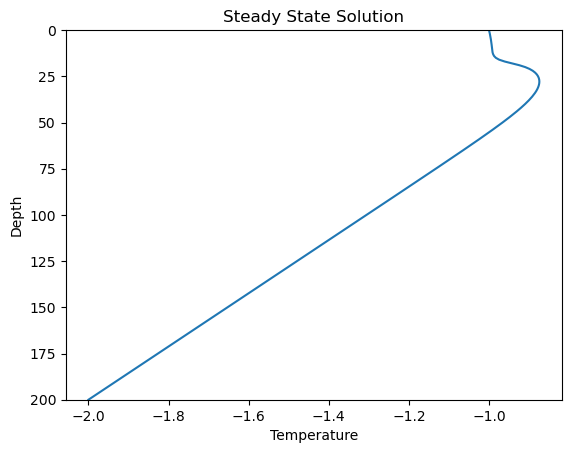

In [5]:
plt.plot(T,d)
plt.ylim(200,0)
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.title('Steady State Solution')

Question 2.

Initial Conditions: Scenario 1

In [6]:
#
yinitial = T
t_beg = 0
t_end = 43200 #seconds in a 12h day (24 hours took too ling to plot)
dt = 5 #seconds
#d = np.arange(0,200+1,dt)
theTime = np.arange(t_beg, t_end, dt)
nsteps = len(theTime)
#
def derivs(A,T,theTime):
    f = np.matmul(A,T)
    return f

def euler(dt,A,T,derivs,theTime):
    ynew = T + dt*derivs(A,T,theTime)
    return ynew
#
Ts_euler = []
T1 = yinitial
Ts_euler.append(yinitial)
#
for i in np.arange(0,nsteps):
    Tnew = euler(dt,A,T1,derivs,theTime[i])
    #Ts_euler.append(Tnew)
    Tnew[0]=Tnew[1]
    Tnew[-1]=Tnew[-2]
    Ts_euler.append(Tnew)
    T1 = Tnew
    


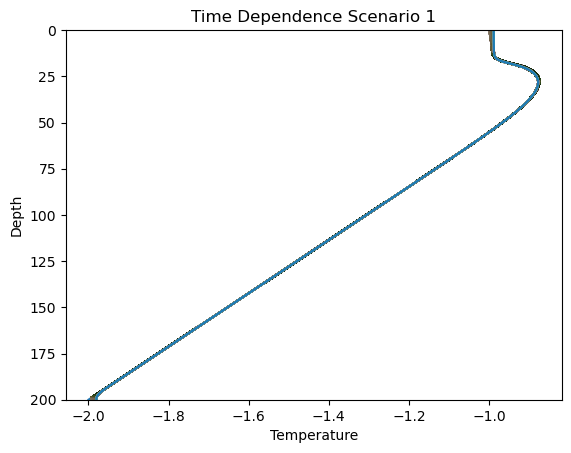

In [7]:
for i in range(len(Ts_euler)):
    plt.plot(Ts_euler[i],d)
    plt.ylim(200,0)
    plt.xlabel('Temperature')
    plt.ylabel('Depth')
    plt.title('Time Dependence Scenario 1')
#plt.gca().invert_yaxis()

Initial Conditions: Scenario 2

In [8]:
for i in range(6):
    T[i] = T[i]+0.2
#
Ts_euler = []
T1 = yinitial
Ts_euler.append(yinitial)

for i in np.arange(0,nsteps):
    Tnew = euler(dt,A,T1,derivs,theTime[i])
    Tnew[0] = Tnew[1]
    Tnew[-1] = Tnew[-2]
    Ts_euler.append(Tnew)
    T1 = Tnew

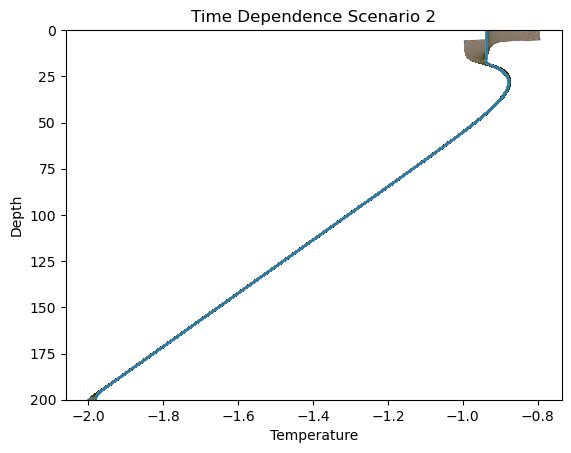

In [9]:
for i in range(len(Ts_euler)):
    plt.plot(Ts_euler[i],d)
    plt.ylim(200,0)
    plt.xlabel('Temperature')
    plt.ylabel('Depth')
    plt.title('Time Dependence Scenario 2')

Initial Conditions: Scenario 3

In [10]:
# re-initialize steady state solution
reT = np.linalg.solve(A,F)

# index 151 and 161 because it starts at 0
for i in np.arange(151,161,1):
    reT[i] = reT[i]+0.2
#
Ts_euler = []
T1 = reT
Ts_euler.append(reT)

for i in np.arange(0,nsteps):
    Tnew = euler(dt, A, T1, derivs, theTime[i])
    Tnew[0] = Tnew[1]
    Tnew[-1] = Tnew[-2]
    Ts_euler.append(Tnew)
    T1 = Tnew

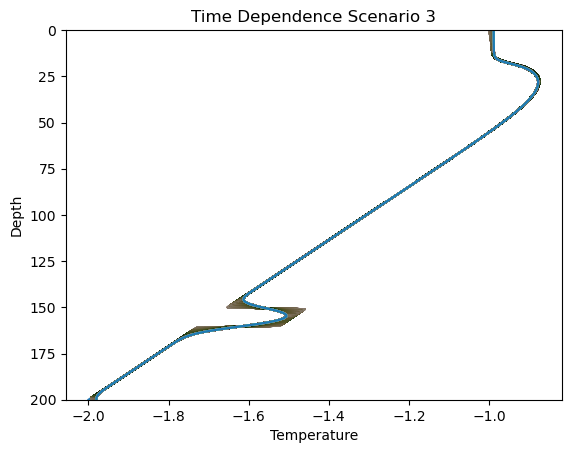

In [11]:
for i in range(len(Ts_euler)):
    plt.plot(Ts_euler[i],d)
    plt.ylim(200,0)
    plt.xlabel('Temperature')
    plt.ylabel('Depth')
    plt.title('Time Dependence Scenario 3')